# Lab 2 - Part 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

## Topological Ordering of Animal Species

#### Import data

In [2]:
species = np.genfromtxt('data/animalnames.txt', dtype='str')
props = np.genfromtxt('data/animals.dat', dtype='int', delimiter=',').reshape(-1, 84)

#### Train nodes using SOM

In [3]:
N,M = props.shape
num_nodes = 100
W = np.random.randn(num_nodes,M)
lr = 0.2
epochs = 20
neighbourhood_start = 50
neigh_decay = neighbourhood_start/epochs

for e in range(epochs):
    neighbourhood = round(neighbourhood_start - neigh_decay*e)
    for idx in range(N):
        p = props[idx]
        W_p = W-p
        distances = np.linalg.norm(W_p, axis=1)
        winner = np.argmin(distances)
        for node in range(num_nodes):
            if node >= winner-neighbourhood and node <= winner+neighbourhood:
                W[node] = W[node] + lr*(p-W[node])

#### Find and winner nodes for each species

In [4]:
pos = [-1] * N
for idx in range(N):
    p = props[idx]
    W_p = W-p
    distances = np.linalg.norm(W_p, axis=1)
    winner = np.argmin(distances)
    pos[idx] = winner

grouped = [(eval(species[i]),pos[i]) for i in range(N)]
grouped.sort(key=lambda t: t[1])
for i in range(N): print(grouped[i])

('giraffe', 0)
('pig', 0)
('camel', 1)
('antelop', 3)
('horse', 5)
('rat', 9)
('rabbit', 14)
('kangaroo', 17)
('elephant', 20)
('bat', 23)
('skunk', 26)
('cat', 29)
('ape', 32)
('lion', 35)
('dog', 38)
('hyena', 41)
('bear', 44)
('walrus', 50)
('crocodile', 56)
('seaturtle', 58)
('frog', 61)
('ostrich', 68)
('penguin', 71)
('duck', 74)
('pelican', 77)
('spider', 84)
('housefly', 90)
('moskito', 90)
('butterfly', 95)
('beetle', 96)
('dragonfly', 99)
('grasshopper', 99)


## Cyclic tour

#### Import data

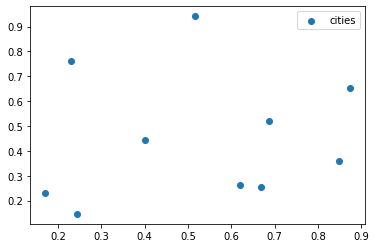

In [5]:
import io
s = io.BytesIO(open('data/cities.dat', 'rb').read().replace(b';',b''))
city = np.genfromtxt(s, dtype='float', delimiter=',', comments='%')
plt.scatter(city[:,0], city[:,1], label='cities')
plt.legend()
plt.show()

#### Train nodes using SOM

In [6]:
N,M = city.shape
num_nodes = N
W = np.random.randn(num_nodes,M)
lr = 0.2
epochs = 20
neighbourhood_start = 2
neigh_decay = neighbourhood_start/epochs

for e in range(epochs): 
    neighbourhood = round(neighbourhood_start - neigh_decay*e) 
    for idx in range(N):
        c = city[idx]
        W_c = W-c
        distances = np.linalg.norm(W_c, axis=1)
        winner = np.argmin(distances)
        for node in range(num_nodes):
            if node >= winner-neighbourhood and node <= winner+neighbourhood:
                W[node] = W[node] + lr*(c-W[node])
            elif winner+neighbourhood >= N and node <= (winner+neighbourhood) % N:
                W[node] = W[node] + lr*(c-W[node])
            elif winner-neighbourhood < 0 and node >= (winner-neighbourhood) % N:
                W[node] = W[node] + lr*(c-W[node])

#### Plot found tour

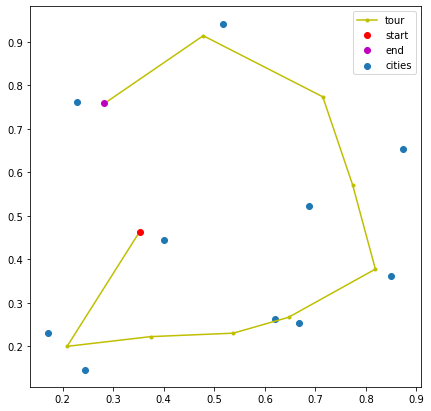

In [7]:
pos = [-1] * N
plt.figure(figsize=(7,7))
plt.scatter(city[:,0], city[:,1], label='cities')
plt.plot(W[:,0], W[:,1], 'y.-', label='tour')
plt.plot(W[0,0],W[0,1], 'ro', label='start')
plt.plot(W[N-1,0],W[N-1,1], 'mo', label='end')
plt.legend()
plt.show()

## Data Clustering: Votes of MPs

#### Import data

In [8]:
votes = np.genfromtxt('data/votes.dat', comments='%', delimiter=',').reshape(349,-1)
party = np.genfromtxt('data/mpparty.dat', comments='%', delimiter=',')
sex = np.genfromtxt('data/mpsex.dat', comments='%', delimiter=',')
district = np.genfromtxt('data/mpdistrict.dat', comments='%', delimiter=',')
name = np.genfromtxt('data/mpnames.txt', delimiter='\n', dtype='str', encoding='latin-1')

#### Train nodes using SOM

In [9]:
N,M = votes.shape
grid_rows = 10
grid_cols = 10
num_nodes = grid_rows * grid_cols
W = np.random.randn(num_nodes,M)
lr = 0.2
epochs = 20
neighbourhood_start = 50
neigh_decay = neighbourhood_start/epochs

for e in range(epochs):
    neighbourhood = round(neighbourhood_start - neigh_decay*e)
    for idx in range(N):
        p = votes[idx]
        W_p = W-p
        distances = np.linalg.norm(W_p, axis=1)
        winner = np.argmin(distances)
        winner_row = int(winner/grid_rows)
        winner_col = winner % grid_cols
        for node_row in range(grid_rows):
            for node_col in range(grid_cols):
                manhattan_dist = abs(winner_row-node_row)+abs(winner_col-node_col)
                if manhattan_dist < neighbourhood:
                    node = node_row*grid_rows + node_col
                    W[node] = W[node] + lr*(p-W[node])

#### Calculate grid positions for each MP

In [10]:
grid_x = np.zeros(N)
grid_y = np.zeros(N)
for idx in range(N):
    p = votes[idx]
    W_p = W-p
    distances = np.linalg.norm(W_p, axis=1)
    winner = np.argmin(distances)
    winner_row = int(winner/grid_rows)
    winner_col = winner % grid_cols
    grid_x[idx] = winner_col
    grid_y[idx] = winner_row

#### Plot grid positions based on party

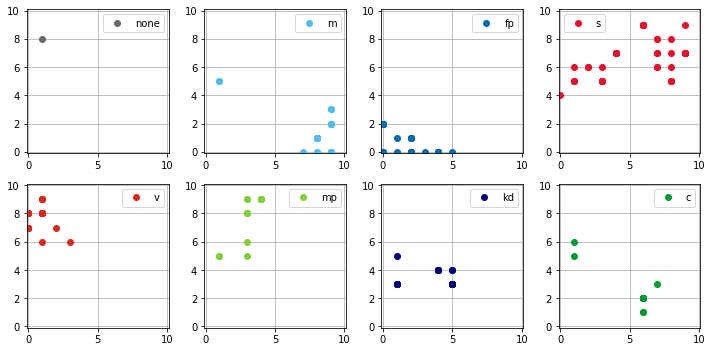

In [11]:
parties = ['none', 'm', 'fp', 's', 'v', 'mp', 'kd', 'c']
pcolors = ['#696b6a', '#52BDEC', '#006AB3', '#E8112d', 
           '#DA291C', '#83CF39', '#000077', '#009933']
fig, axs = plt.subplots(2,4,figsize=(10,5))
for i in range(0,len(parties)):
    mps = np.where(party == i)[0]
    ax = axs[i//4,i%4]
    ax.plot(grid_x[mps], grid_y[mps], marker='o', linestyle='', color=pcolors[i],
             label=parties[i])
    ax.grid()
    ax.set(xlim=(-.1,10.1), ylim=(-.1,10.1))
    ax.legend()
plt.tight_layout()
plt.show()

#### Plot grid positions based on sex

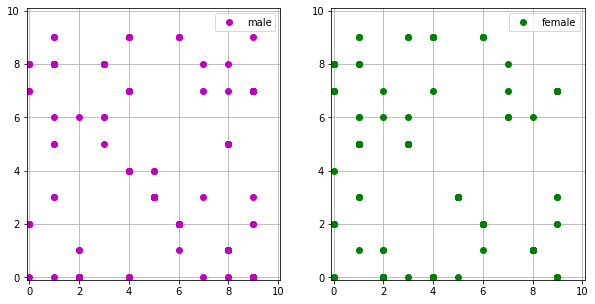

In [12]:
sexes = ['male', 'female']
scolors = ['m','g']
fig, axs = plt.subplots(1,2,figsize=(10,5))
for i in range(len(sexes)):
    mps = np.where(sex == i)[0]
    ax = axs[i]
    ax.plot(grid_x[mps], grid_y[mps], marker='o', linestyle='', color=scolors[i],
             label=sexes[i])
    ax.grid()
    ax.set(xlim=(-.1,10.1), ylim=(-.1,10.1))
    ax.legend()
